# Payment Date Prediction 


### Importing related Libraries 

In [1]:
import datetime as dt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

### Store the dataset into the Dataframe


In [2]:
df = pd.read_csv('dataset.csv')  #Here i am importing given dataset and getting shape of dataset.

### Check the shape of the dataframe


In [3]:
df.shape

(50000, 19)

### Check the Detail information of the dataframe

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           50000 non-null  int64  
 5   doc_id                  50000 non-null  int64  
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  int64  
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  int64  
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

### Display All the column names

In [5]:
df.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'posting_id', 'area_business', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id', 'isOpen'],
      dtype='object')

### Describe the entire dataset

In [6]:
df.describe()

,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,posting_id,area_business,total_open_amount,baseline_create_date,invoice_id,isOpen
count,50000.000000,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,50000.0,0.0,50000.000000,5.000000e+04,4.999400e+04,50000.000000
mean,2019.305700,2.012238e+09,2.019351e+07,2.019354e+07,2.019368e+07,1.0,NaN,32337.021651,2.019354e+07,2.011340e+09,0.200000
std,0.460708,2.885235e+08,4.496041e+03,4.482134e+03,4.470614e+03,0.0,NaN,39205.975231,4.482701e+03,2.766335e+08,0.400004
min,2019.000000,1.928502e+09,2.018123e+07,2.018123e+07,2.018122e+07,1.0,NaN,0.720000,2.018121e+07,1.928502e+09,0.000000
25%,2019.000000,1.929342e+09,2.019050e+07,2.019051e+07,2.019052e+07,1.0,NaN,4928.312500,2.019050e+07,1.929342e+09,0.000000
50%,2019.000000,1.929964e+09,2.019091e+07,2.019091e+07,2.019093e+07,1.0,NaN,17609.010000,2.019091e+07,1.929964e+09,0.000000
75%,2020.000000,1.930619e+09,2.020013e+07,2.020013e+07,2.020022e+07,1.0,NaN,47133.635000,2.020013e+07,1.930619e+09,0.000000
max,2020.000000,9.500000e+09,2.020052e+07,2.020052e+07,2.020071e+07,1.0,NaN,668593.360000,2.020052e+07,2.960636e+09,1.000000


# Data Cleaning

- Show top 5 records from the dataset

In [7]:
df.head(5)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,200769623,WAL-MAR corp,2/11/2020 0:00,2020,1930438491,1/26/2020,20200125,20200126,20200210,USD,RV,1,NaN,54273.28,20200126,NAH4,1.930438e+09,0
1,U001,200980828,BEN E,8/8/2019 0:00,2019,1929646410,7/22/2019,20190722,20190722,20190811,USD,RV,1,NaN,79656.60,20190722,NAD1,1.929646e+09,0
2,U001,200792734,MDV/ trust,12/30/2019 0:00,2019,1929873765,9/14/2019,20190914,20190914,20190929,USD,RV,1,NaN,2253.86,20190914,NAA8,1.929874e+09,0
3,CA02,140105686,SYSC llc,NaN,2020,2960623488,3/30/2020,20200330,20200330,20200410,CAD,RV,1,NaN,3299.70,20200331,CA10,2.960623e+09,1
4,U001,200769623,WAL-MAR foundation,11/25/2019 0:00,2019,1930147974,11/13/2019,20191113,20191113,20191128,USD,RV,1,NaN,33133.29,20191113,NAH4,1.930148e+09,0


### Display the Null values percentage against every columns (compare to the total number of records)

- Output expected : area_business - 100% null, clear_data = 20% null, invoice_id = 0.12% null

In [8]:
df.isnull().sum() / df.shape[0] * 100

business_code               0.000
cust_number                 0.000
name_customer               0.000
clear_date                 20.000
buisness_year               0.000
doc_id                      0.000
posting_date                0.000
document_create_date        0.000
document_create_date.1      0.000
due_in_date                 0.000
invoice_currency            0.000
document type               0.000
posting_id                  0.000
area_business             100.000
total_open_amount           0.000
baseline_create_date        0.000
cust_payment_terms          0.000
invoice_id                  0.012
isOpen                      0.000
dtype: float64

### Display Invoice_id and Doc_Id

- Note - Many of the would have same invoice_id and doc_id


In [9]:
df[["invoice_id", "doc_id"]]

,invoice_id,doc_id
0,1.930438e+09,1930438491
1,1.929646e+09,1929646410
2,1.929874e+09,1929873765
3,2.960623e+09,2960623488
4,1.930148e+09,1930147974
...,...,...
49995,1.930797e+09,1930797071
49996,1.929744e+09,1929744070
49997,1.930537e+09,1930536775
49998,1.930199e+09,1930198546


#### Write a code to check - 'baseline_create_date',"document_create_date",'document_create_date.1' - these columns are almost same.

- Please note, if they are same, we need to drop them later



In [10]:
check = np.where((df['document_create_date.1'] == df['document_create_date']), "Same", "Different")
check1 = pd.DataFrame(check, columns=['Same/Different'])
print(check1.value_counts())
#We foud that baseline_create_date and document_create_date	 values are nearly same.

Same/Different
Different         28768
Same              21232
dtype: int64


#### Please check, Column 'posting_id' is constant columns or not


In [11]:
df["posting_id"].nunique()

1

#### Please check 'isOpen' is a constant column and relevant column for this project or not

In [12]:
df["isOpen"].nunique()

2

### Write the code to drop all the following columns from the dataframe

- 'area_business'
- "posting_id"
- "invoice_id"
- "document_create_date"
- "isOpen"
- 'document type' 
- 'document_create_date.1

In [13]:

cols = ["area_business", "posting_id", "invoice_id", "document_create_date", "isOpen", "document type",
        "document_create_date.1"]
df.drop(cols, axis=1, inplace=True)

### Please check from the dataframe whether all the columns are removed or not 

In [14]:
df.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'due_in_date',
       'invoice_currency', 'total_open_amount', 'baseline_create_date',
       'cust_payment_terms'],
      dtype='object')

### Show all the Duplicate rows from the dataframe

In [15]:
#keeping the 1st value amongst dupicated values which is denoted by 'first'
df[df.duplicated(keep='first')]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
1041,U001,200769623,WAL-MAR in,3/12/2019 0:00,2019,1928870382,2/28/2019,20190315,USD,19557.41,20190228,NAH4
2400,U001,200769623,WAL-MAR trust,8/28/2019 0:00,2019,1929758460,8/18/2019,20190902,USD,5600.41,20190818,NAH4
2584,U001,200769623,WAL-MAR corporation,12/16/2019 0:00,2019,1930216806,12/4/2019,20191219,USD,35352.17,20191204,NAH4
3755,U001,200769623,WAL-MAR,11/22/2019 0:00,2019,1930137035,11/12/2019,20191127,USD,2982.64,20191112,NAH4
3873,CA02,140104409,LOB associates,NaN,2020,2960628616,4/14/2020,20200425,CAD,82975.82,20200415,CA10
...,...,...,...,...,...,...,...,...,...,...,...,...
49928,U001,200915438,GROC trust,8/15/2019 0:00,2019,1929645942,7/25/2019,20190809,USD,6969.00,20190725,NAA8
49963,U001,200759878,SA us,1/29/2019 0:00,2019,1928613993,1/13/2019,20190128,USD,10968.24,20190113,NAH4
49986,U001,200772670,ASSOCIAT foundation,6/12/2019 0:00,2019,1929403090,5/29/2019,20190613,USD,155837.53,20190529,NAU5
49990,U001,200765011,MAINES llc,6/6/2019 0:00,2019,1929365364,5/22/2019,20190606,USD,4008.05,20190522,NAA8


### Display the Number of Duplicate Rows

In [16]:
df.duplicated().sum()

1161

### Drop all the Duplicate Rows

In [17]:
df.drop_duplicates(keep='first', inplace=True)

#### Now check for all duplicate rows now

- Note - It must be 0 by now

In [18]:
df.duplicated().sum()

0

### Check for the number of Rows and Columns in your dataset

In [19]:
df.shape

(48839, 12)

### Find out the total count of null values in each columns

In [20]:
df.isnull().sum()

business_code              0
cust_number                0
name_customer              0
clear_date              9681
buisness_year              0
doc_id                     0
posting_date               0
due_in_date                0
invoice_currency           0
total_open_amount          0
baseline_create_date       0
cust_payment_terms         0
dtype: int64

#Data type Conversion 

### Please check the data type of each column of the dataframe

In [21]:
df.dtypes

business_code            object
cust_number              object
name_customer            object
clear_date               object
buisness_year             int64
doc_id                    int64
posting_date             object
due_in_date               int64
invoice_currency         object
total_open_amount       float64
baseline_create_date      int64
cust_payment_terms       object
dtype: object

### Check the datatype format of below columns

- clear_date  
- posting_date
- due_in_date 
- baseline_create_date

In [22]:
df[["clear_date", "posting_date", "due_in_date", "baseline_create_date"]].dtypes

clear_date              object
posting_date            object
due_in_date              int64
baseline_create_date     int64
dtype: object

### converting date columns into date time formats

- clear_date  
- posting_date
- due_in_date 
- baseline_create_date


- **Note - You have to convert all these above columns into "%Y%m%d" format**

In [23]:
def date_format(date):
    x = str(date)
    year = int(x[0:4])
    month = int(x[4:6])
    day = int(x[6:])
    return dt.datetime(year, month, day)


# Down-casting date columns from float to int
df['buisness_year'] = pd.to_numeric(df['buisness_year'], downcast='integer')
df['due_in_date'] = pd.to_numeric(df['due_in_date'], downcast='integer')
df['baseline_create_date'] = pd.to_numeric(df['baseline_create_date'], downcast='integer')

# Applying the date formatter
df['due_in_date'] = df['due_in_date'].apply(date_format)
df['baseline_create_date'] = df['baseline_create_date'].apply(date_format)

# Converting object type to datetime format
df['clear_date'] = pd.to_datetime(df['clear_date'])
df['posting_date'] = pd.to_datetime(df['posting_date'])

# Printing the head of the df
df.head(10)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
0,U001,200769623,WAL-MAR corp,2020-02-11,2020,1930438491,2020-01-26,2020-02-10,USD,54273.28,2020-01-26,NAH4
1,U001,200980828,BEN E,2019-08-08,2019,1929646410,2019-07-22,2019-08-11,USD,79656.60,2019-07-22,NAD1
2,U001,200792734,MDV/ trust,2019-12-30,2019,1929873765,2019-09-14,2019-09-29,USD,2253.86,2019-09-14,NAA8
3,CA02,140105686,SYSC llc,NaT,2020,2960623488,2020-03-30,2020-04-10,CAD,3299.70,2020-03-31,CA10
4,U001,200769623,WAL-MAR foundation,2019-11-25,2019,1930147974,2019-11-13,2019-11-28,USD,33133.29,2019-11-13,NAH4
5,CA02,140106181,THE corporation,2019-12-04,2019,2960581231,2019-09-20,2019-10-04,CAD,22225.84,2019-09-24,CA10
6,U001,200769623,WAL-MAR in,2019-11-12,2019,1930083373,2019-11-01,2019-11-16,USD,7358.49,2019-11-01,NAH4
7,U001,200744019,TARG us,NaT,2020,1930659387,2020-03-19,2020-04-03,USD,11173.02,2020-03-19,NAA8
8,U001,200769623,WAL-MAR corp,2019-06-18,2019,1929439637,2019-06-07,2019-06-22,USD,15995.04,2019-06-07,NAH4
9,U001,200762301,C&S WH systems,2019-03-06,2019,1928819386,2019-02-20,2019-03-07,USD,28.63,2019-02-20,NAC6


### Please check the datatype of all the columns after conversion of the above 4 columns

In [24]:
df[["clear_date", "posting_date", "due_in_date", "baseline_create_date"]].dtypes

clear_date              datetime64[ns]
posting_date            datetime64[ns]
due_in_date             datetime64[ns]
baseline_create_date    datetime64[ns]
dtype: object

#### the invoice_currency column contains two different categories, USD and CAD

- Please do a count of each currency 

In [25]:
df["invoice_currency"].value_counts()

USD    45011
CAD     3828
Name: invoice_currency, dtype: int64

#### display the "total_open_amount" column value

In [26]:
df["total_open_amount"]

0        54273.28
1        79656.60
2         2253.86
3         3299.70
4        33133.29
           ...   
49995     3187.86
49996     6766.54
49997     6120.86
49998       63.48
49999     1790.30
Name: total_open_amount, Length: 48839, dtype: float64

### Convert all CAD into USD currency of "total_open_amount" column

- 1 CAD = 0.7 USD
- Create a new column i.e "converted_usd" and store USD and convered CAD to USD

In [27]:
df['converted_usd'] = np.where(df['invoice_currency'] == 'CAD', df['total_open_amount'] * 0.7, df['total_open_amount'])

### Display the new "converted_usd" column values

In [28]:
df[['converted_usd']]

,converted_usd
0,54273.28
1,79656.60
2,2253.86
3,2309.79
4,33133.29
...,...
49995,3187.86
49996,6766.54
49997,6120.86
49998,63.48


### Display year wise total number of record 

- Note -  use "buisness_year" column for this 

In [29]:
df["buisness_year"].value_counts()

2019    33975
2020    14864
Name: buisness_year, dtype: int64

### Write the code to delete the following columns 

- 'invoice_currency'
- 'total_open_amount', 

In [30]:
df.drop(['invoice_currency', 'total_open_amount'], axis=1, inplace=True)

### Write a code to check the number of columns in dataframe

In [31]:
print(df.shape[1])
print(df.columns)

11
Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'due_in_date',
       'baseline_create_date', 'cust_payment_terms', 'converted_usd'],
      dtype='object')


# Splitting the Dataset 

### Look for all columns containing null value

- Note - Output expected is only one column 

In [32]:
def calculate_null_values(dataFrame):
    nan_values = dataFrame.isna()
    nan_columns = nan_values.any()

    columns_with_nan = dataFrame.columns[nan_columns].tolist()
    return columns_with_nan

columns = calculate_null_values(df)
print(columns)

['clear_date']


#### Find out the number of null values from the column that you got from the above code

In [33]:
def get_null_values(dataFrame, column_name):
    count = dataFrame[column_name].isna().sum()
    return count

null_count = get_null_values(df, columns[0])
print(null_count)

9681


### On basis of the above column we are spliting data into dataset

- First dataframe (refer that as maindata) only containing the rows, that have NO NULL data in that column ( This is going to be our train dataset ) 
- Second dataframe (refer that as nulldata) that contains the columns, that have Null data in that column ( This is going to be our test dataset ) 

In [34]:
nulldata = df.loc[df['clear_date'].isnull()]
maindata = df.loc[~df['clear_date'].isnull()]
maindata = maindata.reset_index(drop=True)

### Check the number of Rows and Columns for both the dataframes 

In [35]:
maindata.shape

(39158, 11)

In [36]:
nulldata.shape

(9681, 11)

### Display the 5 records from maindata and nulldata dataframes

In [37]:
maindata.head(5)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
0,U001,200769623,WAL-MAR corp,2020-02-11,2020,1930438491,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.280
1,U001,200980828,BEN E,2019-08-08,2019,1929646410,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.600
2,U001,200792734,MDV/ trust,2019-12-30,2019,1929873765,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.860
3,U001,200769623,WAL-MAR foundation,2019-11-25,2019,1930147974,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.290
4,CA02,140106181,THE corporation,2019-12-04,2019,2960581231,2019-09-20,2019-10-04,2019-09-24,CA10,15558.088


In [38]:
nulldata.head(5)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
3,CA02,140105686,SYSC llc,NaT,2020,2960623488,2020-03-30,2020-04-10,2020-03-31,CA10,2309.79
7,U001,200744019,TARG us,NaT,2020,1930659387,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.02
10,U001,200418007,AM,NaT,2020,1930610806,2020-03-11,2020-03-26,2020-03-11,NAA8,3525.59
14,U001,200739534,OK systems,NaT,2020,1930788296,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.65
15,U001,200353024,DECA corporation,NaT,2020,1930817482,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.06


## Considering the **maindata**

#### Generate a new column "Delay" from the existing columns

- Note - You are expected to create a new column 'Delay' from two existing columns, "clear_date" and "due_in_date" 
- Formula - Delay = clear_date - due_in_date

In [39]:
maindata["Delay"] = maindata["clear_date"] - maindata["due_in_date"]

### Generate a new column "avgdelay" from the existing columns

- Note - You are expected to make a new column "avgdelay" by grouping "name_customer" column with reapect to mean of the "Delay" column.
- This new column "avg_delay" is meant to store "customer_name" wise delay
- groupby('name_customer')['Delay'].mean(numeric_only=False)
- Display the new "avg_delay" column

In [40]:
a = pd.DataFrame(maindata.groupby('name_customer')['Delay'].mean(numeric_only=False))

a.rename(columns={'Delay': 'avg_Delay'}, inplace=True)
a

,avg_Delay
name_customer,
11078 us,17 days 00:00:00
17135 associates,-10 days +00:00:00
17135 llc,-3 days +00:00:00
236008 associates,-3 days +00:00:00
99 CE,2 days 00:00:00
...,...
YEN BROS corp,0 days 00:00:00
YEN BROS corporation,-1 days +12:00:00
YEN BROS llc,-2 days +00:00:00


You need to add the "avg_delay" column with the maindata, mapped with "name_customer" column

 - Note - You need to use map function to map the avgdelay with respect to "name_customer" column

In [41]:
maindata["avg_delay"] = maindata["name_customer"].map(a['avg_Delay'])

### Observe that the "avg_delay" column is in days format. You need to change the format into seconds

- Days_format :  17 days 00:00:00
- Format in seconds : 1641600.0

In [42]:
maindata["avg_delay"] = maindata["avg_delay"] / np.timedelta64(1, 's')
maindata["avg_delay"].head()

0   -2.334702e+05
1    1.641600e+06
2    6.990545e+05
3   -1.887923e+05
4    6.172800e+06
Name: avg_delay, dtype: float64

### Display the maindata dataframe 

In [43]:
maindata.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,Delay,avg_delay
0,U001,200769623,WAL-MAR corp,2020-02-11,2020,1930438491,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.280,1 days,-2.334702e+05
1,U001,200980828,BEN E,2019-08-08,2019,1929646410,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.600,-3 days,1.641600e+06
2,U001,200792734,MDV/ trust,2019-12-30,2019,1929873765,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.860,92 days,6.990545e+05
3,U001,200769623,WAL-MAR foundation,2019-11-25,2019,1930147974,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.290,-3 days,-1.887923e+05
4,CA02,140106181,THE corporation,2019-12-04,2019,2960581231,2019-09-20,2019-10-04,2019-09-24,CA10,15558.088,61 days,6.172800e+06


### Since you have created the "avg_delay" column from "Delay" and "clear_date" column, there is no need of these two columns anymore 

- You are expected to drop "Delay" and "clear_date" columns from maindata dataframe 

In [44]:
maindata.drop(['Delay', 'clear_date'], axis=1, inplace=True)
maindata.head()

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,avg_delay
0,U001,200769623,WAL-MAR corp,2020,1930438491,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.280,-2.334702e+05
1,U001,200980828,BEN E,2019,1929646410,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.600,1.641600e+06
2,U001,200792734,MDV/ trust,2019,1929873765,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.860,6.990545e+05
3,U001,200769623,WAL-MAR foundation,2019,1930147974,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.290,-1.887923e+05
4,CA02,140106181,THE corporation,2019,2960581231,2019-09-20,2019-10-04,2019-09-24,CA10,15558.088,6.172800e+06


# Splitting of Train and the Test Data

### You need to split the "maindata" columns into X and y dataframe

- Note - y should have the target column i.e. "avg_delay" and the other column should be in X

- X is going to hold the source fields and y will be going to hold the target fields

In [45]:
X = maindata.drop(['avg_delay'], axis=1)

In [46]:
y = maindata['avg_delay']

#### You are expected to split both the dataframes into train and test format in 60:40 ratio 

- Note - The expected output should be in "X_train", "X_loc_test", "y_train", "y_loc_test" format 

In [47]:
X_train, X_loc_test, y_train, y_loc_test = train_test_split(X, y, test_size=0.4, random_state=0)

### Please check for the number of rows and columns of all the new dataframes (all 4)

In [48]:
print('X_train: ',X_train.shape)
print('y_train: ',y_train.shape)
print('X_loc_test: ',X_loc_test.shape)
print('y_loc_test: ',y_loc_test.shape)

X_train:  (23494, 10)
y_train:  (23494,)
X_loc_test:  (15664, 10)
y_loc_test:  (15664,)


### Now you are expected to split the "X_loc_test" and "y_loc_test" dataset into "Test" and "Validation" (as the names given below) dataframe with 50:50 format 

- Note - The expected output should be in "X_val", "X_test", "y_val", "y_test" format

In [49]:
X_val, X_test, y_val, y_test = train_test_split(X_loc_test, y_loc_test, test_size=0.5, random_state=0)

### Please check for the number of rows and columns of all the 4 dataframes 

In [50]:
print('X_val: ',X_val.shape)
print('y_val: ',y_val.shape)
print('X_test: ',X_test.shape)
print('y_test: ',y_test.shape)

X_val:  (7832, 10)
y_val:  (7832,)
X_test:  (7832, 10)
y_test:  (7832,)


# Exploratory Data Analysis (EDA) 

### Distribution Plot of the target variable (use the dataframe which contains the target field)

- Note - You are expected to make a distribution plot for the target variable 

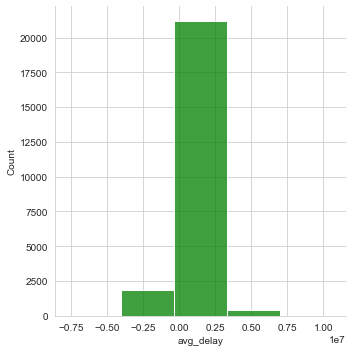

In [51]:
sns.set_style('whitegrid')
sns.displot(data=y_train, kde=False, color='green', bins=5)

### You are expected to group the X_train dataset on 'name_customer' column with 'doc_id' in the x_train set

### Need to store the outcome into a new dataframe 

- Note code given for groupby statement- X_train.groupby(by=['name_customer'], as_index=False)['doc_id'].count()

In [52]:
temp_X_train = X_train.groupby(by=["name_customer"], as_index=False)["doc_id"].count()
temp_X_train.head(5)
#temp_X_train.plot()

,name_customer,doc_id
0,17135 associates,1
1,236008 associates,1
2,99 CE associates,2
3,99 CE corporation,2
4,99 CE foundation,2


### You can make another distribution plot of the "doc_id" column from x_train

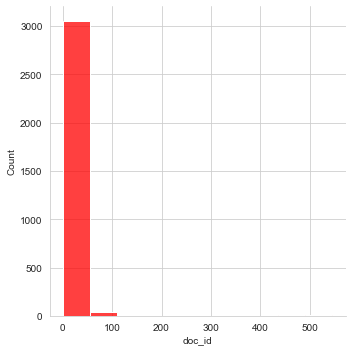

In [53]:
sns.displot(data=temp_X_train, x="doc_id", kde=False, color='red', bins=10)

#### Create a Distribution plot only for business_year and a seperate distribution plot of "business_year" column along with the doc_id" column


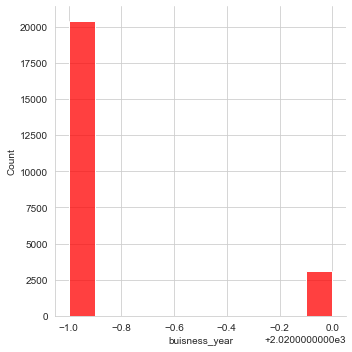

In [54]:
sns.displot(data=X_train, x="buisness_year", kde=False, color='red', bins=10)

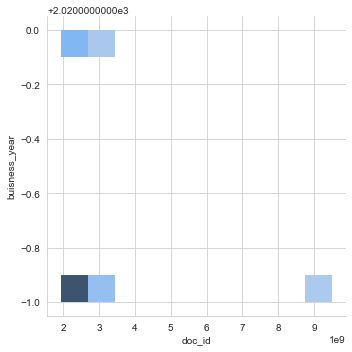

In [55]:
sns.displot(data=X_train, x="doc_id", y="buisness_year", bins=10)
# TODO :  Review it later...a

# Feature Engineering 

### Display and describe the X_train dataframe 

In [56]:
X_train

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
35886,U001,200794332,COST foundation,2020,1930448249,2020-01-28,2020-02-12,2020-01-28,NAAX,36273.03
14338,U001,200706844,WINC trust,2020,1930517131,2020-02-13,2020-02-28,2020-02-13,NAA8,6349.27
17006,U001,200803720,DEC us,2019,1928589714,2019-01-08,2019-01-24,2019-01-01,NAM4,282.84
30683,U001,200752302,KROGER,2020,1930508809,2020-02-12,2020-02-27,2020-02-12,NAA8,64749.18
20038,U001,200974851,RESTA co,2019,1929483483,2019-06-12,2019-06-27,2019-06-12,NAA8,2066.63
...,...,...,...,...,...,...,...,...,...,...
20757,U001,200769623,WAL-MAR associates,2019,1930152454,2019-11-14,2019-11-29,2019-11-14,NAH4,3449.63
32103,U001,200793568,SUPE in,2019,1930222273,2019-12-06,2019-12-21,2019-12-06,NAA8,40591.75
30403,U001,100036066,GROC associates,2019,1929174676,2019-04-22,2019-05-07,2019-04-22,NAA8,24869.32
21243,U001,200769623,WAL-MAR associates,2019,1929555422,2019-06-28,2019-07-13,2019-06-28,NAH4,42362.89


In [57]:
X_train.describe()

,buisness_year,doc_id,converted_usd
count,23494.000000,2.349400e+04,23494.000000
mean,2019.132247,2.014021e+09,30999.755826
std,0.338766,2.956842e+08,36630.432880
min,2019.000000,1.928502e+09,4.380000
25%,2019.000000,1.929174e+09,4622.179500
50%,2019.000000,1.929731e+09,16919.885000
75%,2019.000000,1.930209e+09,45911.302500
max,2020.000000,9.500000e+09,632134.240000


#### The "business_code" column inside X_train, is a categorical column, so you need to perform Labelencoder on that particular column

- Note - call the Label Encoder from sklearn library and use the fit() function on "business_code" column
- Note - Please fill in the blanks (two) to complete this code

In [58]:
from sklearn.preprocessing import LabelEncoder
business_coder = LabelEncoder()
business_coder.fit(X_train["business_code"])

LabelEncoder()

#### You are expected to store the value into a new column i.e. "business_code_enc"

- Note - For Training set you are expected to use fit_trainsform()
- Note - For Test set you are expected to use the trainsform()
- Note - For Validation set you are expected to use the trainsform()


- Partial code is provided, please fill in the blanks 

In [59]:
X_train['business_code_enc'] = business_coder.fit_transform(X_train['business_code'])

In [60]:
X_val['business_code_enc'] = business_coder.transform(X_val['business_code'])
X_test['business_code_enc'] = business_coder.transform(X_test['business_code'])

### Display "business_code" and "business_code_enc" together from X_train dataframe 

In [61]:
X_train[["business_code", "business_code_enc"]]

,business_code,business_code_enc
35886,U001,1
14338,U001,1
17006,U001,1
30683,U001,1
20038,U001,1
...,...,...
20757,U001,1
32103,U001,1
30403,U001,1
21243,U001,1


#### Create a function called "custom" for dropping the columns 'business_code' from train, test and validation dataframe

- Note - Fill in the blank to complete the code

In [62]:
def custom(col ,traindf = X_train,valdf = X_val,testdf = X_test):
    traindf.drop(col, axis =1,inplace=True)
    valdf.drop(col,axis=1 , inplace=True)
    testdf.drop(col,axis=1 , inplace=True)

    return traindf,valdf ,testdf

### Call the function by passing the column name which needed to be dropped from train, test and validation dataframes. Return updated dataframes to be stored in X_train ,X_val, X_test  

- Note = Fill in the blank to complete the code 

In [63]:
X_train, X_val, X_test = custom(['business_code'])

### Manually replacing str values with numbers, Here we are trying manually replace the customer numbers with some specific values like, 'CCCA' as 1, 'CCU' as 2 and so on. Also we are converting the datatype "cust_number" field to int type.

- We are doing it for all the three dataframes as shown below. This is fully completed code. No need to modify anything here 



In [64]:
X_train['cust_number'] = X_train['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)
X_test['cust_number'] = X_test['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)
X_val['cust_number'] = X_val['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)


#### It differs from LabelEncoder by handling new classes and providing a value for it [Unknown]. Unknown will be added in fit and transform will take care of new item. It gives unknown class id.

#### This will fit the encoder for all the unique values and introduce unknown value

- Note - Keep this code as it is, we will be using this later on.  

In [65]:
# For encoding unseen labels
class EncoderExt(object):
    def __init__(self):
        self.label_encoder = LabelEncoder()
        self.classes_ = None  # TODO : Maybe remove this... Added manually

    def fit(self, data_list):
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_
        return self

    def transform(self, data_list):
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x == unique_item else x for x in new_data_list]
        return self.label_encoder.transform(new_data_list)

### Use the user define Label Encoder function called "EncoderExt" for the "name_customer" column

- Note - Keep the code as it is, no need to change

In [66]:
label_encoder = EncoderExt()
label_encoder.fit(X_train['name_customer'])
X_train['name_customer_enc']=label_encoder.transform(X_train['name_customer'])
X_val['name_customer_enc']=label_encoder.transform(X_val['name_customer'])
X_test['name_customer_enc']=label_encoder.transform(X_test['name_customer'])

### As we have created the a new column "name_customer_enc", so now drop "name_customer" column from all three dataframes

- Note - Keep the code as it is, no need to change

In [67]:
X_train ,X_val, X_test = custom(['name_customer'])

### Using Label Encoder for the "cust_payment_terms" column

- Note - Keep the code as it is, no need to change

In [68]:
label_encoder1 = EncoderExt()
label_encoder1.fit(X_train['cust_payment_terms'])
X_train['cust_payment_terms_enc']=label_encoder1.transform(X_train['cust_payment_terms'])
X_val['cust_payment_terms_enc']=label_encoder1.transform(X_val['cust_payment_terms'])
X_test['cust_payment_terms_enc']=label_encoder1.transform(X_test['cust_payment_terms'])

In [69]:
X_train ,X_val, X_test = custom(['cust_payment_terms'])

## Check the datatype of all the columns of Train, Test and Validation dataframes realted to X

- Note - You are expected yo use dtype

In [70]:
X_train.dtypes

cust_number                        int32
buisness_year                      int16
doc_id                             int64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
converted_usd                    float64
business_code_enc                  int32
name_customer_enc                  int32
cust_payment_terms_enc             int32
dtype: object

In [71]:
X_test.dtypes

cust_number                        int32
buisness_year                      int16
doc_id                             int64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
converted_usd                    float64
business_code_enc                  int32
name_customer_enc                  int32
cust_payment_terms_enc             int32
dtype: object

In [72]:
X_val.dtypes

cust_number                        int32
buisness_year                      int16
doc_id                             int64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
converted_usd                    float64
business_code_enc                  int32
name_customer_enc                  int32
cust_payment_terms_enc             int32
dtype: object

### From the above output you can notice their are multiple date columns with datetime format

### In order to pass it into our model, we need to convert it into float format

### You need to extract day, month and year from the "posting_date" column 

1.   Extract days from "posting_date" column and store it into a new column "day_of_postingdate" for train, test and validation dataset 
2.   Extract months from "posting_date" column and store it into a new column "month_of_postingdate" for train, test and validation dataset
3.   Extract year from "posting_date" column and store it into a new column "year_of_postingdate" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year






In [73]:
X_train['day_of_postingdate'] = X_train['posting_date'].dt.day
X_train['month_of_postingdate'] = X_train['posting_date'].dt.month
X_train['year_of_postingdate'] = X_train['posting_date'].dt.year

X_val['day_of_postingdate'] = X_val['posting_date'].dt.day
X_val['month_of_postingdate'] = X_val['posting_date'].dt.month
X_val['year_of_postingdate'] = X_val['posting_date'].dt.year


X_test['day_of_postingdate'] = X_test['posting_date'].dt.day
X_test['month_of_postingdate'] = X_test['posting_date'].dt.month
X_test['year_of_postingdate'] = X_test['posting_date'].dt.year



### pass the "posting_date" column into the Custom function for train, test and validation dataset

In [74]:
X_train ,X_val, X_test = custom(['posting_date'])

### You need to extract day, month and year from the "baseline_create_date" column 

1.   Extract days from "baseline_create_date" column and store it into a new column "day_of_createdate" for train, test and validation dataset 
2.   Extract months from "baseline_create_date" column and store it into a new column "month_of_createdate" for train, test and validation dataset
3.   Extract year from "baseline_create_date" column and store it into a new column "year_of_createdate" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year


- Note - Do as it is been shown in the previous two code boxes

### Extracting Day, Month, Year for 'baseline_create_date' column

In [75]:
X_train['day_of_createdate'] = X_train['baseline_create_date'].dt.day
X_train['month_of_createdate'] = X_train['baseline_create_date'].dt.month
X_train['year_of_createdate'] = X_train['baseline_create_date'].dt.year

X_val['day_of_createdate'] = X_val['baseline_create_date'].dt.day
X_val['month_of_createdate'] = X_val['baseline_create_date'].dt.month
X_val['year_of_createdate'] = X_val['baseline_create_date'].dt.year

X_test['day_of_createdate'] = X_test['baseline_create_date'].dt.day
X_test['month_of_createdate'] = X_test['baseline_create_date'].dt.month
X_test['year_of_createdate'] = X_test['baseline_create_date'].dt.year

### pass the "baseline_create_date" column into the Custom function for train, test and validation dataset

In [76]:
X_train, X_val, X_test = custom(['baseline_create_date'])

### You need to extract day, month and year from the "due_in_date" column 

1.   Extract days from "due_in_date" column and store it into a new column "day_of_due" for train, test and validation dataset 
2.   Extract months from "due_in_date" column and store it into a new column "month_of_due" for train, test and validation dataset
3.   Extract year from "due_in_date" column and store it into a new column "year_of_due" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year

- Note - Do as it is been shown in the previous code

In [77]:
X_train['day_of_due'] = X_train['due_in_date'].dt.day
X_train['month_of_due'] = X_train['due_in_date'].dt.month
X_train['year_of_due'] = X_train['due_in_date'].dt.year

X_val['day_of_due'] = X_val['due_in_date'].dt.day
X_val['month_of_due'] = X_val['due_in_date'].dt.month
X_val['year_of_due'] = X_val['due_in_date'].dt.year

X_test['day_of_due'] = X_test['due_in_date'].dt.day
X_test['month_of_due'] = X_test['due_in_date'].dt.month
X_test['year_of_due'] = X_test['due_in_date'].dt.year

pass the "due_in_date" column into the Custom function for train, test and validation dataset

In [78]:
X_train, X_val, X_test = custom(['due_in_date'])

### Check for the datatypes for train, test and validation set again

- Note - all the data type should be in either int64 or float64 format 


In [79]:
print("Train: -\n", X_train.dtypes, "\n\nTest: -\n", X_test.dtypes, "\n\nValidation: -\n", X_val.dtypes)

Train: -
 cust_number                 int32
buisness_year               int16
doc_id                      int64
converted_usd             float64
business_code_enc           int32
name_customer_enc           int32
cust_payment_terms_enc      int32
day_of_postingdate          int64
month_of_postingdate        int64
year_of_postingdate         int64
day_of_createdate           int64
month_of_createdate         int64
year_of_createdate          int64
day_of_due                  int64
month_of_due                int64
year_of_due                 int64
dtype: object 

Test: -
 cust_number                 int32
buisness_year               int16
doc_id                      int64
converted_usd             float64
business_code_enc           int32
name_customer_enc           int32
cust_payment_terms_enc      int32
day_of_postingdate          int64
month_of_postingdate        int64
year_of_postingdate         int64
day_of_createdate           int64
month_of_createdate         int64
year_of_creat

# Feature Selection

### Filter Method

- Calling the VarianceThreshold Function 
- Note - Keep the code as it is, no need to change 

In [80]:
from sklearn.feature_selection import VarianceThreshold
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(X_train)
len(X_train.columns[constant_filter.get_support()])

16

- Note - Keep the code as it is, no need to change 


In [81]:
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[constant_filter.get_support()]]
print(len(constant_columns))

0


- transpose the feature matrice
- print the number of duplicated features
- select the duplicated features columns names

- Note - Keep the code as it is, no need to change 


In [82]:
x_train_T = X_train.T
print(x_train_T.duplicated().sum())
duplicated_columns = x_train_T[x_train_T.duplicated()].index.values

0


### Filtering depending upon correlation matrix value
- We have created a function called handling correlation which is going to return fields based on the correlation matrix value with a threshold of 0.8

- Note - Keep the code as it is, no need to change 

In [83]:
def handling_correlation(X_train,threshold=0.8):
    corr_features = set()
    corr_matrix = X_train.corr()
    for i in range(len(corr_matrix .columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >threshold:
                colname = corr_matrix.columns[i]
                corr_features.add(colname)
    return list(corr_features)

- Note : Here we are trying to find out the relevant fields, from X_train
- Please fill in the blanks to call handling_correlation() function with a threshold value of 0.85

In [84]:
train=X_train.copy()
handling_correlation(train.copy(), threshold=0.85)

['year_of_postingdate',
 'month_of_createdate',
 'year_of_createdate',
 'month_of_due',
 'day_of_createdate',
 'year_of_due']

### Heatmap for X_train

- Note - Keep the code as it is, no need to change

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

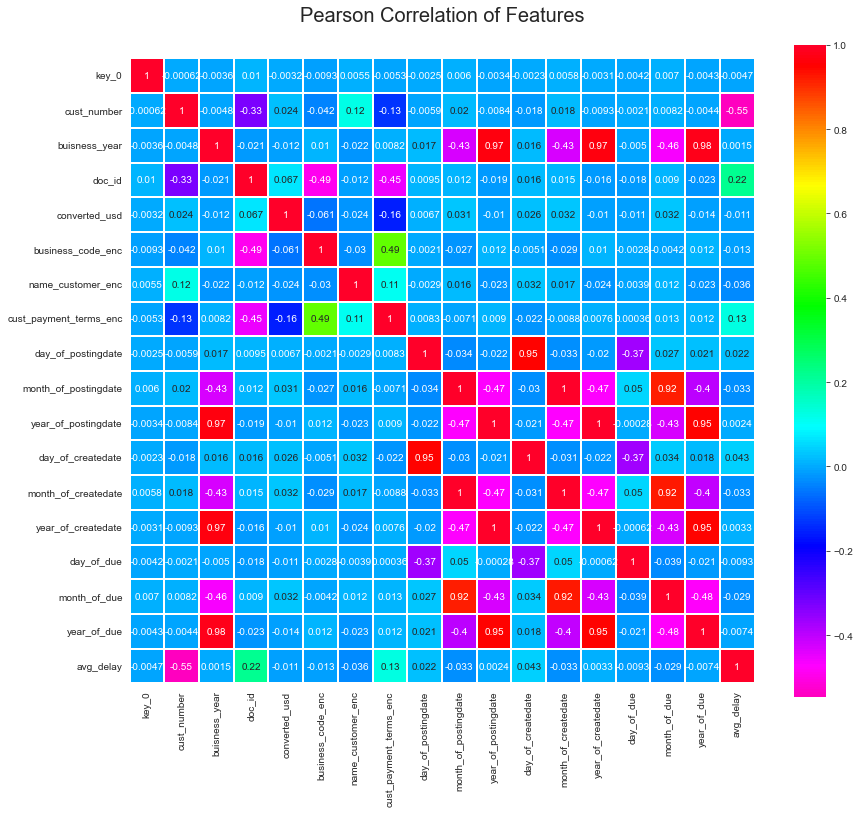

In [85]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=20)
sns.heatmap(X_train.merge(y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap='gist_rainbow_r', linecolor='white', annot=True)

#### Calling variance threshold for threshold value = 0.8

- Note -  Fill in the blanks to call the appropriate method

In [86]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(0.8)
sel.fit(X_train)

VarianceThreshold(threshold=0.8)

In [87]:
sel.variances_

array([1.81954912e+15, 1.14757386e-01, 8.74254278e+16, 1.34173150e+09,
       2.87927752e-01, 1.07015118e+06, 1.35481309e+02, 7.55282009e+01,
       1.22549606e+01, 1.14798749e-01, 7.70243713e+01, 1.22619699e+01,
       1.14937418e-01, 7.66173615e+01, 1.20665594e+01, 1.18125269e-01])

### Features columns are 
- 'year_of_createdate' 
- 'year_of_due'
- 'day_of_createdate'
- 'year_of_postingdate'
- 'month_of_due'
- 'month_of_createdate'

# Modelling 

#### Now you need to compare with different machine learning models, and needs to find out the best predicted model

- Linear Regression
- Decision Tree Regression
- Random Forest Regression
- Support Vector Regression
- Extreme Gradient Boost Regression 

### You need to make different blank list for different evaluation matrix 

- MSE
- R2
- Algorithm

In [88]:
MSE_Score = []
R2_Score = []
Algorithm = []
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### You need to start with the baseline model Linear Regression

- Step 1 : Call the Linear Regression from sklearn library
- Step 2 : make an object of Linear Regression 
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [89]:
from sklearn.linear_model import LinearRegression
Algorithm.append('LinearRegression')
regressor = LinearRegression()
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [90]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [91]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

521974.13121306984

### Display The Comparison Lists

In [92]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression'],[289680195847.444],[0.3198322183596152],

### You need to start with the baseline model Support Vector Regression

- Step 1 : Call the Support Vector Regressor from sklearn library
- Step 2 : make an object of SVR
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [93]:
from sklearn.svm import SVR

Algorithm.append('SVR')
regressor = SVR()
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for "y_test" and "predicted" dataset and store those data inside respective list for comparison 

In [94]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [95]:
predict_test = regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

631968.1689215614

### Display The Comparison Lists

In [96]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i, end=',')

['LinearRegression', 'SVR'],[289680195847.444, 427979886589.643],[0.3198322183596152, -0.004894826160928734],

### Your next model would be Decision Tree Regression

- Step 1 : Call the Decision Tree Regressor from sklearn library
- Step 2 : make an object of Decision Tree
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [97]:
from sklearn.tree import DecisionTreeRegressor

Algorithm.append('DecisionTreRegressor')
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [98]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [99]:
predict_test = regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

497306.53475901415

### Display The Comparison Lists

In [100]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i, end=',')

['LinearRegression', 'SVR', 'DecisionTreRegressor'],[289680195847.444, 427979886589.643, 388907122552.46545],[0.3198322183596152, -0.004894826160928734, 0.08684784599509665],

### Your next model would be Random Forest Regression

- Step 1 : Call the Random Forest Regressor from sklearn library
- Step 2 : make an object of Random Forest
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [101]:
from sklearn.ensemble import RandomForestRegressor

Algorithm.append('RandomForestRegressor')
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [102]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [103]:
predict_test = regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

338721.9403957579

### Display The Comparison Lists


In [104]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i, end=',')

['LinearRegression', 'SVR', 'DecisionTreRegressor', 'RandomForestRegressor'],[289680195847.444, 427979886589.643, 388907122552.46545, 157514801808.26523],[0.3198322183596152, -0.004894826160928734, 0.08684784599509665, 0.6301559621360012],

### The last but not the least model would be XGBoost or Extreme Gradient Boost Regression

- Step 1 : Call the XGBoost Regressor from xgb library
- Step 2 : make an object of Xgboost
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose### Extreme Gradient Boost Regression
- Note -  No need to change the code 

In [105]:
import xgboost as xgb
Algorithm.append('XGB Regressor')
regressor = xgb.XGBRegressor()
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [106]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [107]:
predict_test = regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

350656.3387120784

### Display The Comparison Lists


In [108]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i, end=',')

['LinearRegression', 'SVR', 'DecisionTreRegressor', 'RandomForestRegressor', 'XGB Regressor'],[289680195847.444, 427979886589.643, 388907122552.46545, 157514801808.26523, 153265909840.83405],[0.3198322183596152, -0.004894826160928734, 0.08684784599509665, 0.6301559621360012, 0.6401323411406581],

## You need to make the comparison list into a comparison dataframe 

In [109]:
comp_df = pd.DataFrame(data = {"Algorithm": Algorithm, "MSE_Score": MSE_Score, "R2_Score": R2_Score})
comp_df.head()

,Algorithm,MSE_Score,R2_Score
0,LinearRegression,2.896802e+11,0.319832
1,SVR,4.279799e+11,-0.004895
2,DecisionTreRegressor,3.889071e+11,0.086848
3,RandomForestRegressor,1.575148e+11,0.630156
4,XGB Regressor,1.532659e+11,0.640132


## Now from the Comparison table, you need to choose the best fit model

- Step 1 - Fit X_train and y_train inside the model 
- Step 2 - Predict the X_test dataset
- Step 3 - Predict the X_val dataset


- Note - No need to change the code

In [110]:
regressorfinal = xgb.XGBRegressor()
regressorfinal.fit(X_train, y_train)
predictedfinal = regressorfinal.predict(X_test)
predict_testfinal = regressorfinal.predict(X_val)

### Calculate the Mean Square Error for test dataset

- Note - No need to change the code

In [111]:
mean_squared_error(y_test,predictedfinal,squared=False)

391491.90265040484

### Calculate the mean Square Error for validation dataset

In [112]:
mean_squared_error(y_val, predict_testfinal, squared=False)

350656.3387120784

### Calculate the R2 score for test

In [113]:
r2_score(y_test, predictedfinal)

0.6401323411406581

### Calculate the R2 score for Validation

In [114]:
r2_score(y_val, predict_testfinal)

0.6905912864894136

### Calculate the Accuracy for train Dataset 

In [115]:
regressor.score(X_train, y_train)

0.9561689299223204

### Calculate the accuracy for validation

In [116]:
regressor.score(X_val, y_val)

0.6905912864894136

### Calculate the accuracy for test

In [117]:
regressor.score(X_test, y_test)

0.6401323411406581

## Specify the reason behind choosing your machine learning model 

- Note : Provide your answer as a text here

### Answer:
- MSE is the least among the above models and R2 score is the maximum which tells us that this is a better model than the ones previously compared to other described models
- Since R2 score is the proportion of the variance in the dependent variable that is predictable from the independent variable(s) , therefore we can say that higher the R2 Score the better the data is being fit by the model

## Now you need to pass the Nulldata dataframe into this machine learning model

#### In order to pass this Nulldata dataframe into the ML model, we need to perform the following

- Step 1 : Label Encoding 
- Step 2 : Day, Month and Year extraction 
- Step 3 : Change all the column data type into int64 or float64
- Step 4 : Need to drop the useless columns 

### Display the Nulldata 

In [118]:
nulldata.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
3,CA02,140105686,SYSC llc,NaT,2020,2960623488,2020-03-30,2020-04-10,2020-03-31,CA10,2309.79
7,U001,200744019,TARG us,NaT,2020,1930659387,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.02
10,U001,200418007,AM,NaT,2020,1930610806,2020-03-11,2020-03-26,2020-03-11,NAA8,3525.59
14,U001,200739534,OK systems,NaT,2020,1930788296,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.65
15,U001,200353024,DECA corporation,NaT,2020,1930817482,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.06


### Check for the number of rows and columns in the nulldata

In [119]:
nulldata.shape

(9681, 11)

### Check the Description and Information of the nulldata 

In [120]:
print(nulldata.describe())
print(nulldata.info())

       buisness_year        doc_id  converted_usd
count         9681.0  9.681000e+03    9681.000000
mean          2020.0  2.006165e+09   32065.681125
std              0.0  2.673629e+08   35419.613688
min           2020.0  1.930535e+09       0.720000
25%           2020.0  1.930658e+09    5607.190000
50%           2020.0  1.930731e+09   19024.190000
75%           2020.0  1.930818e+09   47752.640000
max           2020.0  2.960636e+09  653644.800000
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9681 entries, 3 to 49995
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         9681 non-null   object        
 1   cust_number           9681 non-null   object        
 2   name_customer         9681 non-null   object        
 3   clear_date            0 non-null      datetime64[ns]
 4   buisness_year         9681 non-null   int16         
 5   doc_id                9681 non-

### Storing the Nulldata into a different dataset 
# for BACKUP

In [121]:
nulldata1 = nulldata.copy()

### Call the Label Encoder for Nulldata

- Note - you are expected to fit "business_code" as it is a categorical variable
- Note - No need to change the code

In [122]:
from sklearn.preprocessing import LabelEncoder
business_codern = LabelEncoder()
business_codern.fit(nulldata['business_code'])
nulldata['business_code_enc'] = business_codern.transform(nulldata['business_code'])

### Now you need to manually replacing str values with numbers
- Note - No need to change the code

In [123]:
nulldata['cust_number'] = nulldata['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)

## You need to extract day, month and year from the "clear_date", "posting_date", "due_in_date", "baseline_create_date" columns


##### 1.   Extract day from "clear_date" column and store it into 'day_of_cleardate'
##### 2.   Extract month from "clear_date" column and store it into 'month_of_cleardate'
##### 3.   Extract year from "clear_date" column and store it into 'year_of_cleardate'



##### 4.   Extract day from "posting_date" column and store it into 'day_of_postingdate'
##### 5.   Extract month from "posting_date" column and store it into 'month_of_postingdate'
##### 6.   Extract year from "posting_date" column and store it into 'year_of_postingdate'




##### 7.   Extract day from "due_in_date" column and store it into 'day_of_due'
##### 8.   Extract month from "due_in_date" column and store it into 'month_of_due'
##### 9.   Extract year from "due_in_date" column and store it into 'year_of_due'




##### 10.   Extract day from "baseline_create_date" column and store it into 'day_of_createdate'
##### 11.   Extract month from "baseline_create_date" column and store it into 'month_of_createdate'
##### 12.   Extract year from "baseline_create_date" column and store it into 'year_of_createdate'




- Note - You are supposed To use - 

*   dt.day
*   dt.month
*   dt.year

In [124]:
nulldata['day_of_cleardate'] = nulldata['clear_date'].dt.day
nulldata['month_of_cleardate'] = nulldata['clear_date'].dt.month
nulldata['year_of_cleardate'] = nulldata['clear_date'].dt.year

nulldata['day_of_postingdate'] = nulldata['posting_date'].dt.day
nulldata['month_of_postingdate'] = nulldata['posting_date'].dt.month
nulldata['year_of_postingdate'] = nulldata['posting_date'].dt.year

nulldata['day_of_due'] = nulldata['due_in_date'].dt.day
nulldata['month_of_due'] = nulldata['due_in_date'].dt.month
nulldata['year_of_due'] = nulldata['due_in_date'].dt.year

nulldata['day_of_createdate'] = nulldata['baseline_create_date'].dt.day
nulldata['month_of_createdate'] = nulldata['baseline_create_date'].dt.month
nulldata['year_of_createdate'] = nulldata['baseline_create_date'].dt.year

In [125]:
nulldata.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,...,year_of_cleardate,day_of_postingdate,month_of_postingdate,year_of_postingdate,day_of_due,month_of_due,year_of_due,day_of_createdate,month_of_createdate,year_of_createdate
3,CA02,140105686,SYSC llc,NaT,2020,2960623488,2020-03-30,2020-04-10,2020-03-31,CA10,...,NaN,30,3,2020,10,4,2020,31,3,2020
7,U001,200744019,TARG us,NaT,2020,1930659387,2020-03-19,2020-04-03,2020-03-19,NAA8,...,NaN,19,3,2020,3,4,2020,19,3,2020
10,U001,200418007,AM,NaT,2020,1930610806,2020-03-11,2020-03-26,2020-03-11,NAA8,...,NaN,11,3,2020,26,3,2020,11,3,2020
14,U001,200739534,OK systems,NaT,2020,1930788296,2020-04-15,2020-04-30,2020-04-15,NAA8,...,NaN,15,4,2020,30,4,2020,15,4,2020
15,U001,200353024,DECA corporation,NaT,2020,1930817482,2020-04-23,2020-04-26,2020-04-16,NAM2,...,NaN,23,4,2020,26,4,2020,16,4,2020


### Use Label Encoder1 of all the following columns - 
- 'cust_payment_terms' and store into 'cust_payment_terms_enc'
- 'business_code' and store into 'business_code_enc'
- 'name_customer' and store into 'name_customer_enc'

Note - No need to change the code

In [126]:
nulldata['cust_payment_terms_enc']=label_encoder1.transform(nulldata['cust_payment_terms'])
nulldata['business_code_enc']=label_encoder1.transform(nulldata['business_code'])
nulldata['name_customer_enc']=label_encoder.transform(nulldata['name_customer'])


### Check for the datatypes of all the columns of Nulldata

In [127]:
nulldata.dtypes

business_code                     object
cust_number                        int32
name_customer                     object
clear_date                datetime64[ns]
buisness_year                      int16
doc_id                             int64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
cust_payment_terms                object
converted_usd                    float64
business_code_enc                  int32
day_of_cleardate                 float64
month_of_cleardate               float64
year_of_cleardate                float64
day_of_postingdate                 int64
month_of_postingdate               int64
year_of_postingdate                int64
day_of_due                         int64
month_of_due                       int64
year_of_due                        int64
day_of_createdate                  int64
month_of_createdate                int64
year_of_createdate                 int64
cust_payment_ter

### Now you need to drop all the unnecessary columns - 

- 'business_code'
- "baseline_create_date"
- "due_in_date"
- "posting_date"
- "name_customer"
- "clear_date"
- "cust_payment_terms"
- 'day_of_cleardate'
- "month_of_cleardate"
- "year_of_cleardate"

In [128]:
nulldata.drop(['business_code',"baseline_create_date","due_in_date","posting_date","name_customer","clear_date","cust_payment_terms"
,'day_of_cleardate',"month_of_cleardate","year_of_cleardate"], axis=1, inplace=True)

### Check the information of the "nulldata" dataframe

In [129]:
nulldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9681 entries, 3 to 49995
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cust_number             9681 non-null   int32  
 1   buisness_year           9681 non-null   int16  
 2   doc_id                  9681 non-null   int64  
 3   converted_usd           9681 non-null   float64
 4   business_code_enc       9681 non-null   int32  
 5   day_of_postingdate      9681 non-null   int64  
 6   month_of_postingdate    9681 non-null   int64  
 7   year_of_postingdate     9681 non-null   int64  
 8   day_of_due              9681 non-null   int64  
 9   month_of_due            9681 non-null   int64  
 10  year_of_due             9681 non-null   int64  
 11  day_of_createdate       9681 non-null   int64  
 12  month_of_createdate     9681 non-null   int64  
 13  year_of_createdate      9681 non-null   int64  
 14  cust_payment_terms_enc  9681 non-null  

### Compare "nulldata" with the "X_test" dataframe 

- use info() method

In [130]:
###CHECK IF FORMAT IS CORRECT

print(nulldata.info())
print(X_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9681 entries, 3 to 49995
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cust_number             9681 non-null   int32  
 1   buisness_year           9681 non-null   int16  
 2   doc_id                  9681 non-null   int64  
 3   converted_usd           9681 non-null   float64
 4   business_code_enc       9681 non-null   int32  
 5   day_of_postingdate      9681 non-null   int64  
 6   month_of_postingdate    9681 non-null   int64  
 7   year_of_postingdate     9681 non-null   int64  
 8   day_of_due              9681 non-null   int64  
 9   month_of_due            9681 non-null   int64  
 10  year_of_due             9681 non-null   int64  
 11  day_of_createdate       9681 non-null   int64  
 12  month_of_createdate     9681 non-null   int64  
 13  year_of_createdate      9681 non-null   int64  
 14  cust_payment_terms_enc  9681 non-null  

### You must have noticed that there is a mismatch in the column sequence while compairing the dataframes

- Note - In order to fed into the machine learning model, you need to edit the sequence of "nulldata", similar to the "X_test" dataframe

- Display all the columns of the X_test dataframe 
- Display all the columns of the Nulldata dataframe 
- Store the Nulldata with new sequence into a new dataframe 


- Note - The code is given below, no need to change 

In [131]:
X_test.columns

Index(['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'name_customer_enc', 'cust_payment_terms_enc',
       'day_of_postingdate', 'month_of_postingdate', 'year_of_postingdate',
       'day_of_createdate', 'month_of_createdate', 'year_of_createdate',
       'day_of_due', 'month_of_due', 'year_of_due'],
      dtype='object')

In [132]:
nulldata.columns

Index(['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'day_of_postingdate', 'month_of_postingdate',
       'year_of_postingdate', 'day_of_due', 'month_of_due', 'year_of_due',
       'day_of_createdate', 'month_of_createdate', 'year_of_createdate',
       'cust_payment_terms_enc', 'name_customer_enc'],
      dtype='object')

In [133]:
nulldata2=nulldata[['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'name_customer_enc', 'cust_payment_terms_enc',
       'day_of_postingdate', 'month_of_postingdate', 'year_of_postingdate',
       'day_of_createdate', 'month_of_createdate', 'year_of_createdate',
       'day_of_due', 'month_of_due', 'year_of_due']]

### Display the Final Dataset

In [134]:
nulldata2.head()

,cust_number,buisness_year,doc_id,converted_usd,business_code_enc,name_customer_enc,cust_payment_terms_enc,day_of_postingdate,month_of_postingdate,year_of_postingdate,day_of_createdate,month_of_createdate,year_of_createdate,day_of_due,month_of_due,year_of_due
3,140105686,2020,2960623488,2309.79,66,2714,5,30,3,2020,31,3,2020,10,4,2020
7,200744019,2020,1930659387,11173.02,66,2798,18,19,3,2020,19,3,2020,3,4,2020
10,200418007,2020,1930610806,3525.59,66,89,18,11,3,2020,11,3,2020,26,3,2020
14,200739534,2020,1930788296,121105.65,66,2043,18,15,4,2020,15,4,2020,30,4,2020
15,200353024,2020,1930817482,3726.06,66,733,34,23,4,2020,16,4,2020,26,4,2020


### Now you can pass this dataset into you final model and store it into "final_result"

In [135]:
final_result = regressorfinal.predict(nulldata2)

### you need to make the final_result as dataframe, with a column name "avg_delay"

- Note - No need to change the code

In [136]:
final_result = pd.Series(final_result,name='avg_delay')

### Display the "avg_delay" column

In [137]:
final_result

0       882522.125000
1       654349.750000
2        91307.375000
3      -250995.546875
4      -208052.328125
            ...      
9676    611279.875000
9677    595523.250000
9678   -258778.078125
9679    -71620.414062
9680   -120060.867188
Name: avg_delay, Length: 9681, dtype: float32

### Now you need to merge this final_result dataframe with the BACKUP of "nulldata" Dataframe which we have created in earlier steps

In [138]:
nulldata1.reset_index(drop=True, inplace=True)
Final = nulldata1.merge(final_result, on=nulldata.index)

### Display the "Final" dataframe 

In [139]:
Final.head()

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,avg_delay
0,3,CA02,140105686,SYSC llc,NaT,2020,2960623488,2020-03-30,2020-04-10,2020-03-31,CA10,2309.79,882522.125000
1,7,U001,200744019,TARG us,NaT,2020,1930659387,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.02,654349.750000
2,10,U001,200418007,AM,NaT,2020,1930610806,2020-03-11,2020-03-26,2020-03-11,NAA8,3525.59,91307.375000
3,14,U001,200739534,OK systems,NaT,2020,1930788296,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.65,-250995.546875
4,15,U001,200353024,DECA corporation,NaT,2020,1930817482,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.06,-208052.328125


### Check for the Number of Rows and Columns in your "Final" dataframe 

In [140]:
print(Final.shape)
Final.columns

(9681, 13)


Index(['key_0', 'business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'due_in_date',
       'baseline_create_date', 'cust_payment_terms', 'converted_usd',
       'avg_delay'],
      dtype='object')

### Now, you need to do convert the below fields back into date and time format 

- Convert "due_in_date" into datetime format
- Convert "avg_delay" into datetime format
- Create a new column "clear_date" and store the sum of "due_in_date" and "avg_delay"
- display the new "clear_date" column
- Note - Code is given below, no need to change 

In [141]:
Final['clear_date'] = pd.to_datetime(Final['due_in_date']) + pd.to_timedelta(Final['avg_delay'], unit='s')

### Display the "clear_date" column

In [142]:
Final['clear_date']

0      2020-04-20 05:08:42.125000000
1      2020-04-10 13:45:49.750000000
2      2020-03-27 01:21:47.375000000
3      2020-04-27 02:16:44.453125000
4      2020-04-23 14:12:27.671875000
                    ...             
9676   2020-04-01 01:47:59.875000000
9677   2020-05-24 21:25:23.250000000
9678   2020-03-23 00:07:01.921875000
9679   2020-04-08 04:06:19.585937500
9680   2020-05-04 14:38:59.132812500
Name: clear_date, Length: 9681, dtype: datetime64[ns]

### Convert the average delay into number of days format 

- Note - Formula = avg_delay//(24 * 3600)
- Note - full code is given for this, no need to change 

In [143]:
Final['avg_delay'] = Final.apply(lambda row: row.avg_delay//(24 * 3600), axis = 1)

### Display the "avg_delay" column 

In [144]:
Final['avg_delay'].head()

0    10.0
1     7.0
2     1.0
3    -3.0
4    -3.0
Name: avg_delay, dtype: float64

### Now you need to convert average delay column into bucket

- Need to perform binning 
- create a list of bins i.e. bins= [0,15,30,45,60,100]
- create a list of labels i.e. labels = ['0-15','16-30','31-45','46-60','Greatar than 60']
- perform binning by using cut() function from "Final" dataframe


- Please fill up the first two rows of the code

In [145]:

bins= [0,15,30,45,60,100]
labels = ['0-15','16-30','31-45','46-60','Greatar than 60']
Final['Aging Bucket'] = pd.cut(Final['avg_delay'], bins=bins, labels=labels, right=False)

### Now you need to drop "key_0" and "avg_delay" columns from the "Final" Dataframe

In [146]:
Final.drop(['key_0',"avg_delay"], axis=1, inplace=True)

### Display the count of each categoty of new "Aging Bucket" column 

In [147]:
Final['Aging Bucket'].value_counts()

0-15               6783
16-30               328
31-45                70
46-60                12
Greatar than 60       6
Name: Aging Bucket, dtype: int64

### Display your final dataset with aging buckets 

In [148]:
Final.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,Aging Bucket
0,CA02,140105686,SYSC llc,2020-04-20 05:08:42.125000,2020,2960623488,2020-03-30,2020-04-10,2020-03-31,CA10,2309.79,0-15
1,U001,200744019,TARG us,2020-04-10 13:45:49.750000,2020,1930659387,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.02,0-15
2,U001,200418007,AM,2020-03-27 01:21:47.375000,2020,1930610806,2020-03-11,2020-03-26,2020-03-11,NAA8,3525.59,0-15
3,U001,200739534,OK systems,2020-04-27 02:16:44.453125,2020,1930788296,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.65,NaN
4,U001,200353024,DECA corporation,2020-04-23 14:12:27.671875,2020,1930817482,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.06,NaN


### Store this dataframe into the .csv format

In [149]:
Final.to_csv("Harshita_gollani.csv")

# END OF THE PROJECT